In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
raw_co2_data=pd.read_csv('data/owid-co2-data.csv')
raw_co2_data

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015,12.170,1.653,0.198,13.308,1.138,9.350,0.881,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016,10.815,-11.139,-1.356,12.171,1.356,12.542,0.771,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017,10.247,-5.251,-0.568,11.774,1.527,14.902,0.720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018,11.341,10.674,1.094,12.815,1.475,13.006,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


In [13]:
# There area some data without country codes at all
subset=raw_co2_data[raw_co2_data['iso_code'].isnull()]
rest=raw_co2_data.drop(raw_co2_data[raw_co2_data['iso_code'].isnull()].index)
rest

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015,12.170,1.653,0.198,13.308,1.138,9.350,0.881,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016,10.815,-11.139,-1.356,12.171,1.356,12.542,0.771,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017,10.247,-5.251,-0.568,11.774,1.527,14.902,0.720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018,11.341,10.674,1.094,12.815,1.475,13.006,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


Then we need to sort out the countries and select only a single value for each. We'll choose the latest. Conveniently, this code block also loses those without an iso_code at all

In [4]:
nations=pd.unique(raw_co2_data['iso_code'])
for nat_i in nations:
    subset=raw_co2_data[raw_co2_data['iso_code']==nat_i]
    last_year=subset[subset['year']==subset['year'].max()]
    if nat_i == 'AFG':
        co2_data = last_year
    else:
        co2_data = co2_data.append(last_year,ignore_index=False)    


co2_data['iso_code']

70            AFG
293           ALB
397           DZA
427           AND
497           AGO
           ...   
23180         WLF
23450    OWID_WRL
23520         YEM
23590         ZMB
23707         ZWE
Name: iso_code, Length: 214, dtype: object

In [5]:
# Remove two lines that have Our World In Data codes, rather than proper ISO codes 
co2_data=co2_data.drop(co2_data[co2_data['iso_code']=="OWID_WRL"].index)
co2_data=co2_data.drop(co2_data[co2_data['iso_code']=="OWID_KOS"].index)


Next we create a dictionary of cumulative CO2. I can't guarantee that the populations the Our World in Data and the geopandas World dataset are the same. So let's normalise by population. We'll bring the national values along with us though.

In [31]:
cumCO2_per_capita_dict=pd.Series(co2_data.cumulative_co2.values/co2_data.population.values,index=co2_data.iso_code).to_dict()
cumCO2_Nat_dict=pd.Series(co2_data.cumulative_co2.values,index=co2_data.iso_code).to_dict()
cumCO2_Nat_dict

{'AFG': 181.376,
 'ALB': 282.495,
 'DZA': 4445.486,
 'AND': 14.543,
 'AGO': 710.967,
 'AIA': 3.306,
 'ATG': 21.11,
 'ARG': 8289.132,
 'ARM': 686.808,
 'ABW': 75.332,
 'AUS': 18181.941,
 'AUT': 5445.99,
 'AZE': 2594.756,
 'BHS': 163.973,
 'BHR': 891.64,
 'BGD': 1478.845,
 'BRB': 53.748,
 'BLR': 5229.026,
 'BEL': 12459.585,
 'BLZ': 18.488,
 'BEN': 111.579,
 'BMU': 28.453,
 'BTN': 17.285,
 'BOL': 505.417,
 'BES': 29.702,
 'BIH': 935.34,
 'BWA': 142.527,
 'BRA': 15125.104,
 'VGB': 5.384,
 'BRN': 348.124,
 'BGR': 3790.746,
 'BFA': 60.158,
 'BDI': 12.219,
 'KHM': 143.841,
 'CMR': 203.737,
 'CAN': 33113.538,
 'CPV': 12.78,
 'CAF': 11.996,
 'TCD': 25.071,
 'CHL': 2821.995,
 'CHN': 219985.862,
 'CXR': 1.33,
 'COL': 3340.981,
 'COM': 4.79,
 'COG': 75.394,
 'COK': 1.997,
 'CRI': 246.801,
 'CIV': nan,
 'HRV': 1085.411,
 'CUB': 1613.316,
 'CYP': 286.726,
 'CZE': 11884.905,
 'COD': 189.471,
 'DNK': 4057.148,
 'DJI': 18.704,
 'DMA': 4.677,
 'DOM': 726.848,
 'ECU': 1174.312,
 'EGY': 6142.564,
 'SLV': 

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Having loaded in the "world" geodataframe, we need to add the cumulative CO2 data to it.

In [32]:
world['cumCO2_per_capita']=world['iso_a3'] #add a new column to geodataframe
world['cumCO2_per_capita']=world['cumCO2_per_capita'].map(cumCO2_per_capita_dict) #replace contents of column through dictionary
world['cumCO2_Nat']=world['iso_a3'] #add a new column to geodataframe
world['cumCO2_Nat']=world['cumCO2_Nat'].map(cumCO2_Nat_dict) #replace contents of column through dictionary
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,cumCO2_per_capita,area,pop_dens,cumCO2_Nat
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000059,1.639511,5.617150e+05,52.532
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.000004,76.301964,7.070714e+05,231.462
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,8.603984,7.011322e+04,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.000885,1712.995228,2.079613e+04,33113.538
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.001247,1122.281921,2.910372e+05,410238.263
...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.000312,8.604719,8.264098e+05,2740.338
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.000161,1.479321,4.343548e+05,100.854
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,1.231641,1.538800e+06,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.001096,0.639000,1.906429e+06,1528.577


OK. So now lets try to create rough figure, without the distortion...

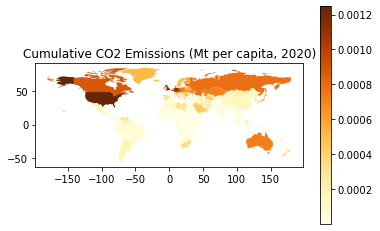

In [9]:
world.plot('cumCO2_per_capita',legend=True,cmap="YlOrBr")
plt.title('Cumulative CO2 Emissions (Mt per capita, 2020)')
plt.show()

There is a function written by JoeryJoery that will update the polygons of a GeoSeries in contiguous area form. It's available at <https://github.com/joeryjoery/PyCartogram>. I'm copying it below

In [10]:
def cartogram(arg_polygons, arg_values, itermax=5, max_size_error=1.0001, epsilon=0.01, verbose=False):
    """
    Generate an area equalizing contiguous cartogram based on the algorithm by (J. Oougenik et al., 1985).
    
    Note: The current function does not include interior boundaries when distorting the polygons!
          This is due to shapely's current way of extracting boundary coordinates which make it 
          cumbersome to separate interior points from exterior points.
    
    :param arg_polygons: geopandas.geoseries.GeoSeries Series of shapely.geometry.Polygon objects.
    :param arg_values: (geo)pandas.Series Series of floating point values.
    :param itermax: int (Optional, default=5) Maximum amount of iterations to perform adjusting coordinates.
    :param max_size_error: float (Optional, default=1.0001) A maximum accuracy until terminating the procedure.
    :param epsilon: float (Optional, default=0.01) Scalar to prevent zero division errors.
    :param verbose: bool (Optional, default=False) Whether to print out intermediary progress. 
    
    :returns: geopandas.geoseries.GeoSeries Copy of :arg_polygons: with the adjusted coordinates.
    
    :references: Dougenik, J.A., Chrisman, N.R. and Niemeyer, D.R. (1985), 
                 AN ALGORITHM TO CONSTRUCT CONTINUOUS AREA CARTOGRAMS*. 
                 The Professional Geographer, 37: 75-81. doi:10.1111/j.0033-0124.1985.00075.x 
    
    :see: Implementation of the same algorithm in R (available on CRAN): https://github.com/sjewo/cartogram
    """    
    polygons = arg_polygons.copy().values
    values = arg_values.copy().values
    
    total_value = values.sum()
    mean_size_error = 100
    
    for iteration in range(itermax):
        if mean_size_error < max_size_error:
            break
        
        # This statement unpacks the centroid Point object to np.array and
        # creates a n x 2 matrix of centroid [x, y] coordinates.
        centroids = np.array(list(map(np.array, polygons.centroid)))
        area = polygons.area
        total_area = area.sum()
        
        desired = total_area * values / total_value
        desired[desired == 0] = epsilon  # Prevent zero division.
        radius = np.sqrt(area / np.pi)
        mass = np.sqrt(desired / np.pi) - np.sqrt(area / np.pi)
        
        size_error = np.max([desired, area], axis=0) - np.min([desired, area], axis=0)
        mean_size_error = np.mean(size_error)
        force_reduction_factor = 1 / (1 + mean_size_error)
        
        if verbose:
            print("Mean size error at iteration {}: {}".format(iteration+1, mean_size_error))
        for row, polygon in enumerate(polygons):
            
            # TODO: Possibly include shapely.geometry.Polygon interior coordinates.
            
            # Some coordinates may appear twice, however, they mustn't be removed.
            # These coordinates are also adjusted, but only computed once:
            coordinates = np.matrix(polygon.exterior.coords)    # [[x1, y2], [x2, y2], ...]
            idx = np.unique(coordinates, axis=0)                # Get unique rows
            
            for k in range(len(idx)):
                # Get positions from coordinates for each unique idx.
                coord_idx = np.where((coordinates[:, 0] == idx[k,0]) & (coordinates[:,1] == idx[k, 1]))[0]
                # Only extract one using coord_idx[0] as coord_idx maps duplicate coordinates.
                new_coordinates = coordinates[coord_idx[0],:]  
                
                # Compute coordinate's euclidean distances to all centroids.
                distances = np.sqrt(np.square(centroids - new_coordinates).sum(axis=1))
                distances = np.array(distances).ravel()  # Converts matrix into flat array.
                
                # Compute force vectors
                Fijs = mass * radius / distances
                Fbij = mass * np.square(distances / radius) * (4 - 3 * distances / radius)
                Fijs[distances <= radius] = Fbij[distances <= radius]
                Fijs *= force_reduction_factor / distances
                
                # Find how much "force" must be applied to the coordinates by computing
                # the dot product of the force vector and the centroid deltas.
                new_coordinates += Fijs.dot(new_coordinates - centroids)
                
            # Set the polygon 
            polygons[row] = Polygon(coordinates, holes = polygon.interiors)
            
    return gpd.geoseries.GeoSeries(polygons)

Before we can use this code though, we need to make sure that world dataset is considered as separate polygons (otherwise the calculations of the centroids will be off). This can be achieved using the `explode` function. 

We also need to make sure that they each have relevant data for each individual polygon - `explode` will directly copy the data, but that implies that 300m people live on Hawaii as well as over the contiguous States. This can be done by assuming that calculating the average population density for each country as well as the area of each polygon and then multiplying back up. This assumes that population within a country is evenly spread thoughout, but as we only need to stop the small island exploding, I suspect that it's sufficiently accurate.

The cartogram code also has problems when the weighting is `NaN`. So we'll just drop inconvenient places.

In [33]:
#Check Geometry
def compute_area(geom):
    area = geom.area
    return area

world['area'] = world['geometry'].apply(lambda x: compute_area(x))
world['pop_dens']=world['pop_est']/world['area']
explode_me=world.drop(['pop_est','area'],axis=1) #drop those ones as we'll want to make new ones later
explode_me=explode_me.drop(explode_me[explode_me['cumCO2_per_capita'].isnull()].index)
exploded=explode_me.explode()
exploded['area'] = exploded['geometry'].apply(lambda x: compute_area(x))
exploded['pop']=exploded['pop_dens']*exploded['area']
exploded['cumulativeCO2']=exploded['cumCO2_per_capita']*exploded['pop']

exploded[['iso_a3','cumulativeCO2']]

iso_a3  cumulativeCO2
0   0    FJI      19.520976
    1    FJI      32.615975
    2    FJI       2.221156
1   0    TZA     215.284740
3   0    CAN   23586.035153
...      ...            ...
171 0    MKD     634.971270
172 0    SRB    2221.455687
173 0    MNE     103.190665
175 0    TTO    1334.856437
176 0    SSD      44.356195

[265 rows x 2 columns]

Now we can create a version of the dataset with altered geometries, scaled by the cumulative CO2 emissions.

The line below may come up with some errors about projections - I'm not worried. It will then give a long list of iterations and 'errors'. I think this the mean error size is the average amount of distortion. You need to fiddle with the itermax value to get the desired balance between the country outlines being noticeably distorted, but also identifiable. I reckon that somewhere are 25 is a good target

In [24]:
exploded.to_crs('+proj=cea')
pop_cart=cartogram(exploded['geometry'], exploded['cumulativeCO2'],itermax=50,verbose=True)


/home/ucfaccb/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ucfaccb/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  exec(code_obj, self.user_global_ns, self.user_ns)


Mean size error at iteration 1: 65.23342398502574
Mean size error at iteration 2: 64.24000258697302
Mean size error at iteration 3: 63.236030960765106
Mean size error at iteration 4: 62.23633980321104
Mean size error at iteration 5: 61.240890199171425
Mean size error at iteration 6: 60.24983414604108
Mean size error at iteration 7: 59.26332736462732
Mean size error at iteration 8: 58.28650341205699
Mean size error at iteration 9: 57.32818478712563
Mean size error at iteration 10: 56.3759056302679
Mean size error at iteration 11: 55.42902450875349
Mean size error at iteration 12: 54.48722039139945
Mean size error at iteration 13: 53.55066157816949
Mean size error at iteration 14: 52.61951758961682
Mean size error at iteration 15: 51.69395874979857
Mean size error at iteration 16: 50.77415679346447
Mean size error at iteration 17: 49.86028703714786
Mean size error at iteration 18: 48.95252713958262
Mean size error at iteration 19: 48.05105946963839
Mean size error at iteration 20: 47.156

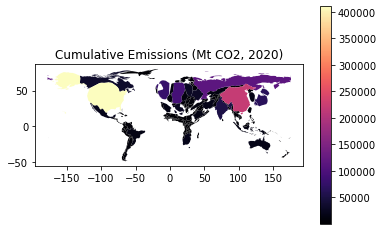

In [35]:
#exploded['geometry']=pop_cart
#exploded['cart']=pop_cart
#exploded.set_geometry('cart')
#print(exploded['pop'].values)
#print(pop_cart)

df = pd.DataFrame({'cumCO2_Nat': exploded['cumCO2_Nat'].values})
gdf = gpd.GeoDataFrame(df, geometry=pop_cart)
gdf.plot('cumCO2_Nat', legend=True, cmap="magma")
plt.title('Cumulative Emissions (Mt CO2, 2020)')
plt.show()

In [26]:
print(sum(exploded['cumulativeCO2'].values))

1526779.4560377246
